In [56]:
import utils
import matplotlib.pyplot as plt

import torch

from Holistic_CAM import HolisticCAM

In [57]:
model, BaseCAMs = utils.load_model('resnet50')
visualizing_workType = 'Seismic' # 'GBR' or 'Seismic'
if_segement = False
do_metric = False

device: cuda


In [58]:
feature_module = model.layer4
get_bottleneck = False
bottleneck = '2'
get_conv = False 
conv = '0'

In [59]:
file = 'dogAndCat.png'

In [60]:
dic = 'pic/'

In [61]:
input_tensor, img_show = utils.read_img(dic+file)

In [62]:
out_vector = model(input_tensor)
first_class = int(torch.argmax(out_vector, dim=1))

In [63]:
classOfInterest = first_class

In [64]:
multiScaleCAM = BaseCAMs.MultiScalBaseCAM(model, feature_module=feature_module,get_bottleneck=get_bottleneck, target_bottleneck=bottleneck, get_conv=get_conv, target_conv=conv)
logit = multiScaleCAM.run(input_tensor, classOfInterest)

In [65]:
holisticCAM = HolisticCAM(multiScaleCAM)
mask = holisticCAM.holistic_CAM(classOfInterest, True, True, 51, (91,91))

Text(0.5, 1.0, 'Holistic-CAM')

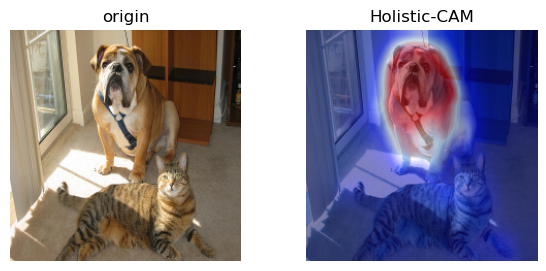

In [66]:
outImg = utils.visualizing_CAM(img_show, mask, visualizing_workType)
# 创建一个图形
plt.figure(figsize=(7, 3))  # 可以设置整个图形的大小
plt.subplot(1, 2, 1)  
plt.imshow(img_show)
plt.axis('off') 
plt.title('origin')
plt.subplot(1, 2, 2) 
plt.imshow(outImg)
plt.axis('off') 
plt.title('Holistic-CAM')